# Setup path information

Setup USML path information assuming that this notebook is in usml/python/test directory.

In [1]:
import sys
import os

USML_DIR = os.path.abspath("../..")
sys.path.append(os.path.join(USML_DIR,"python/src"))
print(USML_DIR)

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

import usml.netcdf
import usml.plot

/home/sreilly/Projects/usml


# Plot beampatterns
Demonstrate the ability to load 3D beam patterns produced by bp_test.cc suite.

Text(0.5, 0, 'z')

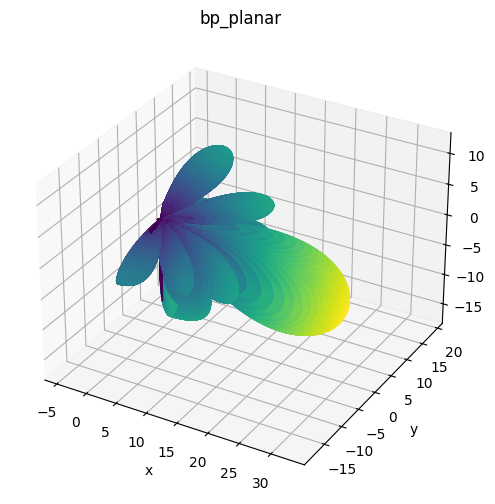

In [2]:
file = "bp_planar.csv"
fullfile = os.path.join(USML_DIR, "beampatterns/test", file)
output = file.replace(".csv", "")
pattern = np.genfromtxt(fullfile, delimiter=',')

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': '3d'})
usml.plot.plot_beampattern_3d(ax, pattern)
ax.set_title(output)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Draw 3D map of bathymetry around Hawaii from ETOPO1 database.

Tests the abilities to:
- Read bathymetry from whole world ETOPO1 database.
- Limit area by specifying lat_range or lng_range.
- Create 3D bathymetry surface plot

Text(0.5, 1.0, 'Depth (m)')

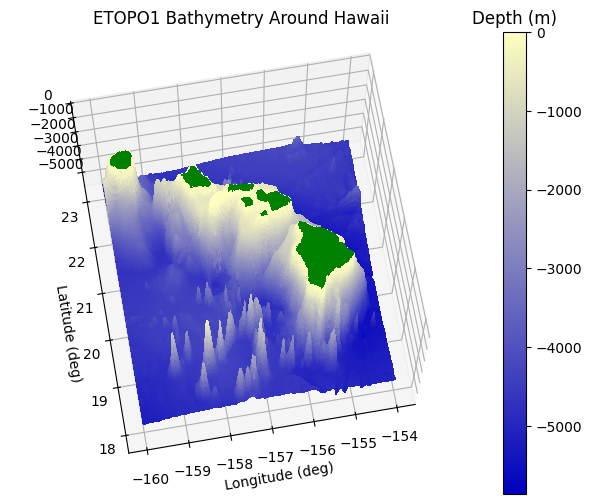

In [3]:
# load bathymetry from whole world database
filename = os.path.join(USML_DIR, "data/bathymetry/ETOPO1_Ice_g_gmt4.grd")
bathymetry = usml.netcdf.Bathymetry(filename, lat_range=(18, 23), lng_range=(-160, -154))
x, y = np.meshgrid(bathymetry.longitude, bathymetry.latitude)
z = bathymetry.altitude

# draw 3D surface plot
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': '3d'})
surface = usml.plot.plot_bathymetry_3d(ax, bathymetry)
ax.view_init(70, -100)
ax.set_xlabel("Longitude (deg)")
ax.set_ylabel("Latitude (deg)")
ax.set_title("ETOPO1 Bathymetry Around Hawaii")
cbar = fig.colorbar(surface)
cbar.ax.set_title("Depth (m)")